# Задание 1

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

# Загрузка данных
data = pd.read_csv('lab1/data_v1-06.csv')

# Предположим, что данные имеют столбцы 'X' и 'y'
# Если названия столбцов другие, нужно их указать
X = data[['x']]  # входная переменная
y = data['y']     # целевая переменная

# 1. Разделение данных на обучающую и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Модель OLS

## Создание и обучение

In [2]:
# 2. Построение линейной регрессии методом OLS
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозы на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Коэффициенты модели
print("Параметры модели:")
print(f"Коэффициент (наклон): {model.coef_[0]:.4f}")
print(f"Интерсепт: {model.intercept_:.4f}")

# Коэффициенты детерминации
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nR² на обучающей выборке: {r2_train:.4f}")
print(f"R² на тестовой выборке: {r2_test:.4f}")

Параметры модели:
Коэффициент (наклон): 3.6799
Интерсепт: -0.0710

R² на обучающей выборке: 0.7130
R² на тестовой выборке: 0.6732


## Расчет доверительного интервала

In [3]:
# 3. Расчет доверительных интервалов для функции регрессии

def calculate_confidence_intervals(X, y_pred, se, confidence_level):
    """
    Расчет доверительных интервалов для функции регрессии
    """
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1 - alpha/2, len(X) - 2)
    
    margin_of_error = t_value * se
    lower_bound = y_pred - margin_of_error
    upper_bound = y_pred + margin_of_error
    
    return lower_bound, upper_bound

# Стандартная ошибка остатков на обучающей выборке
residuals_train = y_train - y_train_pred
se_train = np.std(residuals_train, ddof=2)

# Доверительные интервалы для обучающей выборки
lower_90_train, upper_90_train = calculate_confidence_intervals(X_train, y_train_pred, se_train, 0.90)
lower_99_train, upper_99_train = calculate_confidence_intervals(X_train, y_train_pred, se_train, 0.99)

## Визуализации

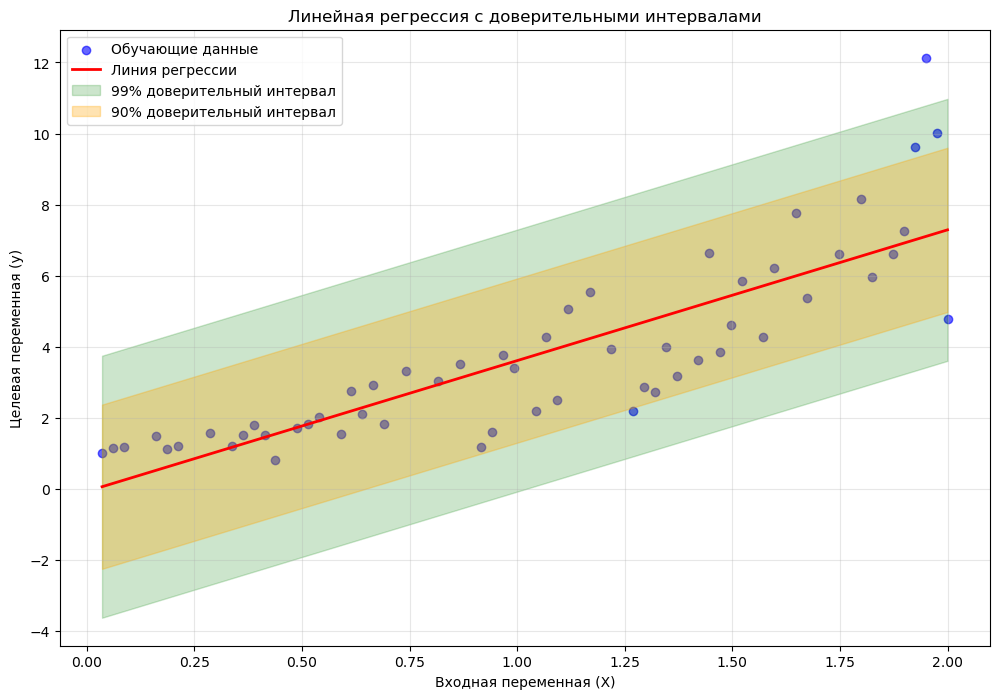

In [4]:
# 4. Визуализация: диаграмма рассеяния с функцией регрессии и доверительными интервалами
plt.figure(figsize=(12, 8))

# Сортируем данные для правильного отображения линий
sorted_indices = np.argsort(X_train.values.flatten())
X_sorted = X_train.values.flatten()[sorted_indices]
y_pred_sorted = y_train_pred[sorted_indices]
lower_90_sorted = lower_90_train[sorted_indices]
upper_90_sorted = upper_90_train[sorted_indices]
lower_99_sorted = lower_99_train[sorted_indices]
upper_99_sorted = upper_99_train[sorted_indices]

# Диаграмма рассеяния
plt.scatter(X_train, y_train, alpha=0.6, label='Обучающие данные', color='blue')

# Линия регрессии
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Линия регрессии')

# Доверительные интервалы
plt.fill_between(X_sorted, lower_99_sorted, upper_99_sorted, 
                 alpha=0.2, color='green', label='99% доверительный интервал')
plt.fill_between(X_sorted, lower_90_sorted, upper_90_sorted, 
                 alpha=0.3, color='orange', label='90% доверительный интервал')

plt.xlabel('Входная переменная (X)')
plt.ylabel('Целевая переменная (y)')
plt.title('Линейная регрессия с доверительными интервалами')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

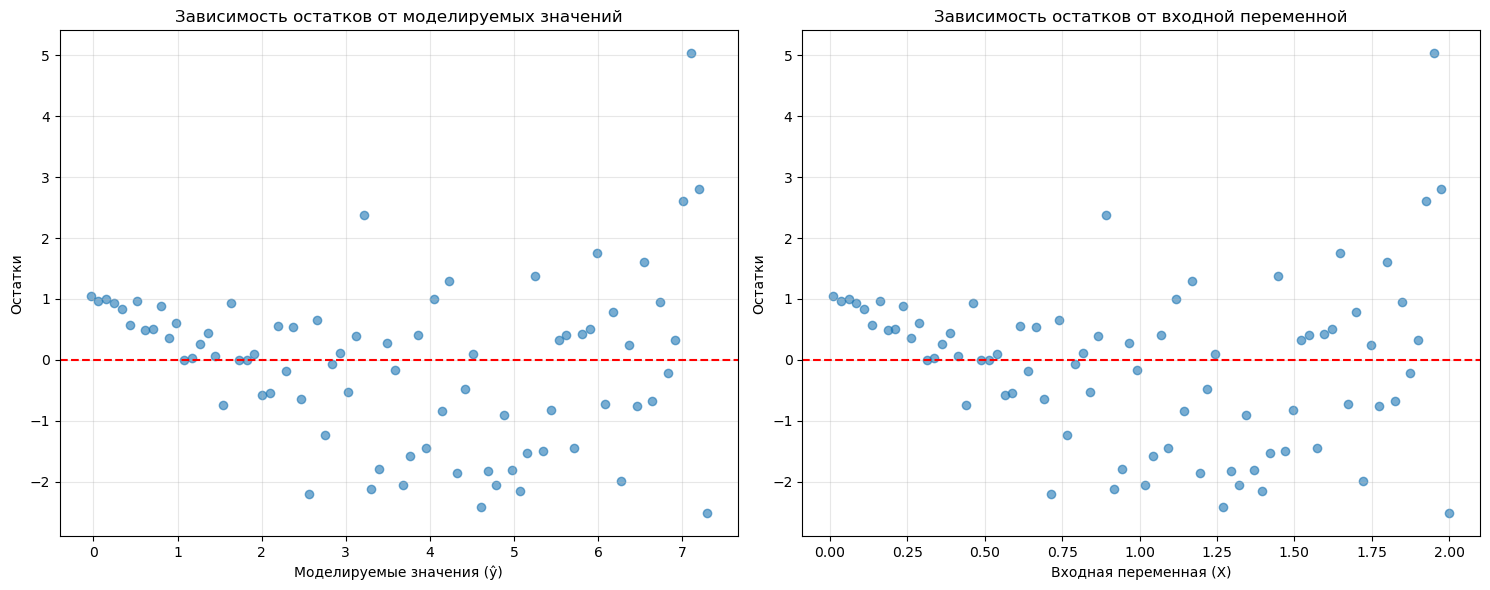

In [5]:
# 5. Анализ остатков

# Расчет остатков для всей модели (обучающая + тестовая)
X_all = np.vstack([X_train.values, X_test.values])
y_all = np.concatenate([y_train, y_test])
y_all_pred = np.concatenate([y_train_pred, y_test_pred])
residuals_all = y_all - y_all_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Зависимость остатков от моделируемых значений
axes[0].scatter(y_all_pred, residuals_all, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Моделируемые значения (ŷ)')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Зависимость остатков от моделируемых значений')
axes[0].grid(True, alpha=0.3)

# График 2: Зависимость остатков от входной переменной
axes[1].scatter(X_all, residuals_all, alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Входная переменная (X)')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Зависимость остатков от входной переменной')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Задание 2

## Качественный анализ на гетероскедастичность остатков

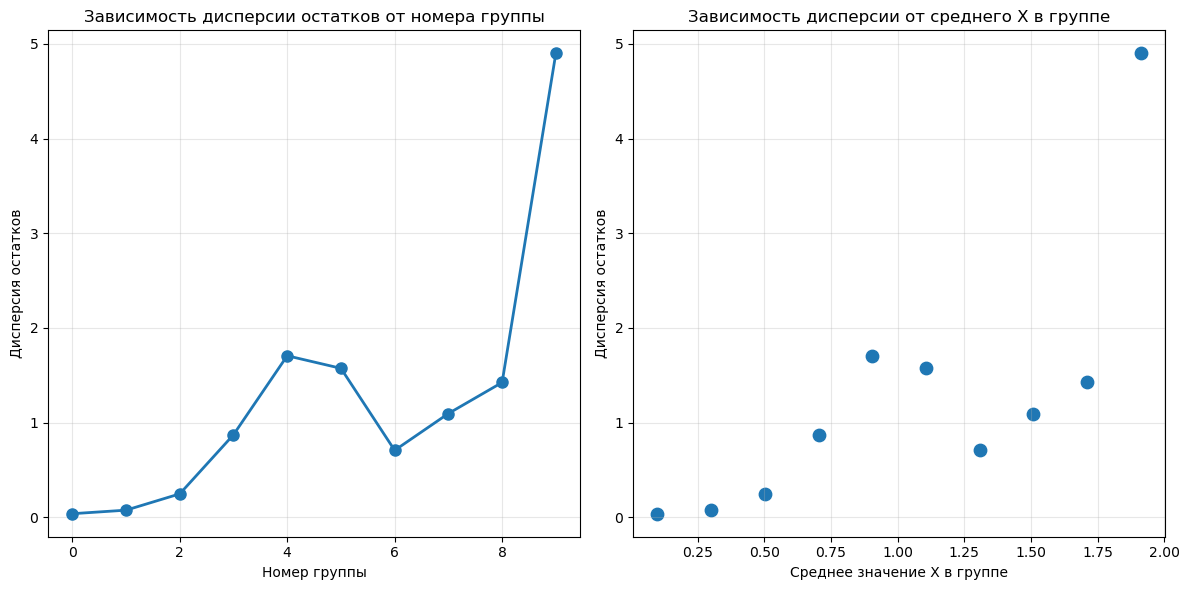

Анализ гетероскедастичности:
Средняя дисперсия остатков: 1.2636
Стандартное отклонение дисперсий: 1.3410
Коэффициент вариации дисперсий: 1.0613
ВНИМАНИЕ: Возможна гетероскедастичность остатков


In [6]:
# 6. Качественный анализ на гетероскедастичность

# Группировка значений входной переменной
n_groups = 10  # количество групп
X_flat = X_all.flatten()

# Создание групп по квантилям
groups = pd.qcut(X_flat, n_groups, labels=False, duplicates='drop')

# Расчет дисперсий остатков в каждой группе
group_variances = []
group_means = []

for group in range(n_groups):
    group_mask = (groups == group)
    if np.sum(group_mask) > 0:
        group_residuals = residuals_all[group_mask]
        group_variance = np.var(group_residuals)
        group_mean = np.mean(X_flat[group_mask])
        
        group_variances.append(group_variance)
        group_means.append(group_mean)

# Визуализация зависимости дисперсии остатков от номера группы
plt.figure(figsize=(12, 6))

# График зависимости дисперсии от номера группы
plt.subplot(1, 2, 1)
plt.plot(range(len(group_variances)), group_variances, 'o-', linewidth=2, markersize=8)
plt.xlabel('Номер группы')
plt.ylabel('Дисперсия остатков')
plt.title('Зависимость дисперсии остатков от номера группы')
plt.grid(True, alpha=0.3)

# График зависимости дисперсии от среднего значения X в группе
plt.subplot(1, 2, 2)
plt.scatter(group_means, group_variances, s=80)
plt.xlabel('Среднее значение X в группе')
plt.ylabel('Дисперсия остатков')
plt.title('Зависимость дисперсии от среднего X в группе')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ результатов
print("Анализ гетероскедастичности:")
print(f"Средняя дисперсия остатков: {np.mean(group_variances):.4f}")
print(f"Стандартное отклонение дисперсий: {np.std(group_variances):.4f}")
print(f"Коэффициент вариации дисперсий: {np.std(group_variances)/np.mean(group_variances):.4f}")

if np.std(group_variances) / np.mean(group_variances) > 0.5:
    print("ВНИМАНИЕ: Возможна гетероскедастичность остатков")
else:
    print("Гетероскедастичность не обнаружена")

# Задание 3

## Построение модели модулей остатков и проверка значимости

In [7]:
# Создаем модель для модулей остатков
abs_residuals = np.abs(residuals_train)

# Модель линейной регрессии для модулей остатков
abs_model = LinearRegression()
abs_model.fit(X_train, abs_residuals)

# Предсказания
abs_residuals_pred = abs_model.predict(X_train)

# Статистическая проверка значимости модели
# Гипотезы:
# H0: модель не значима (коэффициент наклона = 0)
# H1: модель значима (коэффициент наклона ≠ 0)

# Расчет статистики критерия
n = len(X_train)
p = 1  # количество предикторов

# SSE и SSR
sse = np.sum((abs_residuals - abs_residuals_pred) ** 2)
ssr = np.sum((abs_residuals_pred - np.mean(abs_residuals)) ** 2)

# F-статистика
f_statistic = (ssr / p) / (sse / (n - p - 1))

# p-value
p_value = 1 - stats.f.cdf(f_statistic, p, n - p - 1)

print("\nРезультаты модели для модулей остатков:")
print(f"Коэффициент наклона: {abs_model.coef_[0]:.4f}")
print(f"Интерсепт: {abs_model.intercept_:.4f}")
print(f"F-статистика: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Статистическое решение
alpha = 0.05
if p_value < alpha:
    print(f"Статистическое решение: отвергаем H0 (p-value = {p_value:.4f} < α = {alpha})")
    print("Вывод: присутствует гетероскедастичность")
else:
    print(f"Статистическое решение: не отвергаем H0 (p-value = {p_value:.4f} ≥ α = {alpha})")
    print("Вывод: гетероскедастичность отсутствует")


Результаты модели для модулей остатков:
Коэффициент наклона: 0.7646
Интерсепт: 0.2111
F-статистика: 16.8262
p-value: 0.0001
Статистическое решение: отвергаем H0 (p-value = 0.0001 < α = 0.05)
Вывод: присутствует гетероскедастичность


# Задание 4

## а) Веса, обратные модельным значениям функции регрессии из п.3

In [8]:
import statsmodels.api as sm
# Получаем предсказания от модели модулей остатков
abs_pred_values = abs_model.predict(X_train)


# Выбираем константу c для избежания деления на ноль
c = 0.1 * np.max(abs_pred_values) 
weights_a = 1 / (c + abs_pred_values)

# Обучение WLS модели с весами а) используя statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# WLS модель а)
wls_model_a = sm.WLS(y_train, X_train_sm, weights=weights_a)
wls_results_a = wls_model_a.fit()

# Предсказания
y_train_pred_wls_a = wls_results_a.predict(X_train_sm)
y_test_pred_wls_a = wls_results_a.predict(X_test_sm)

# R² для обучающей и тестовой выборок
r2_train_wls_a = wls_results_a.rsquared
r2_test_wls_a = r2_score(y_test, y_test_pred_wls_a)

print("\nРезультаты WLS модели (веса = 1 / (c + Φ(x))):")
print(wls_results_a.summary())
print(f"R² на тестовой выборке: {r2_test_wls_a:.4f}")


Результаты WLS модели (веса = 1 / (c + Φ(x))):
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            WLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     155.2
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.65e-17
Time:                        01:33:47   Log-Likelihood:                -88.325
No. Observations:                  56   AIC:                             180.7
Df Residuals:                      54   BIC:                             184.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

## б) Веса, равные 1/x

In [9]:
epsilon = 1e-6
weights_b = 1 / (X_train.values.flatten() + epsilon)

# Обучение WLS модели с весами б) используя statsmodels
wls_model_b = sm.WLS(y_train, X_train_sm, weights=weights_b)
wls_results_b = wls_model_b.fit()

# Предсказания
y_train_pred_wls_b = wls_results_b.predict(X_train_sm)
y_test_pred_wls_b = wls_results_b.predict(X_test_sm)

# R² для обучающей и тестовой выборок
r2_train_wls_b = wls_results_b.rsquared
r2_test_wls_b = r2_score(y_test, y_test_pred_wls_b)

print("\nРезультаты WLS модели (веса = 1/x):")
print(wls_results_b.summary())
print(f"R² на тестовой выборке: {r2_test_wls_b:.4f}")


Результаты WLS модели (веса = 1/x):
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            WLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           2.15e-19
Time:                        01:33:47   Log-Likelihood:                -83.477
No. Observations:                  56   AIC:                             171.0
Df Residuals:                      54   BIC:                             175.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

## Коррекция остатков

In [10]:
# Остатки для модели а)
residuals_wls_a = wls_results_a.resid
corrected_residuals_a = residuals_wls_a * weights_a

# Остатки для модели б)
residuals_wls_b = wls_results_b.resid
corrected_residuals_b = residuals_wls_b * weights_b

print("\nСкорректированные остатки:")
print(f"Модель а) - стандартное отклонение остатков: {np.std(residuals_wls_a):.4f}")
print(f"Модель а) - стандартное отклонение скорректированных остатков: {np.std(corrected_residuals_a):.4f}")
print(f"Модель б) - стандартное отклонение остатков: {np.std(residuals_wls_b):.4f}")
print(f"Модель б) - стандартное отклонение скорректированных остатков: {np.std(corrected_residuals_b):.4f}")


Скорректированные остатки:
Модель а) - стандартное отклонение остатков: 1.3738
Модель а) - стандартное отклонение скорректированных остатков: 0.9830
Модель б) - стандартное отклонение остатков: 1.4273
Модель б) - стандартное отклонение скорректированных остатков: 1.4860


## Построение доверительных интервалов

In [11]:
# Доверительные интервалы для WLS моделей используя встроенные методы statsmodels

# Доверительные интервалы для модели а)
confidence_intervals_90_a = wls_results_a.get_prediction(X_train_sm).conf_int(alpha=0.10)
confidence_intervals_99_a = wls_results_a.get_prediction(X_train_sm).conf_int(alpha=0.01)

# Доверительные интервалы для модели б)
confidence_intervals_90_b = wls_results_b.get_prediction(X_train_sm).conf_int(alpha=0.10)
confidence_intervals_99_b = wls_results_b.get_prediction(X_train_sm).conf_int(alpha=0.01)

# Для визуализации нам нужны интервалы для отсортированных данных
X_sorted_sm = sm.add_constant(np.sort(X, axis=0))

conf_int_90_sorted_a = wls_results_a.get_prediction(X_sorted_sm).conf_int(alpha=0.10)
conf_int_99_sorted_a = wls_results_a.get_prediction(X_sorted_sm).conf_int(alpha=0.01)

conf_int_90_sorted_b = wls_results_b.get_prediction(X_sorted_sm).conf_int(alpha=0.10)
conf_int_99_sorted_b = wls_results_b.get_prediction(X_sorted_sm).conf_int(alpha=0.01)

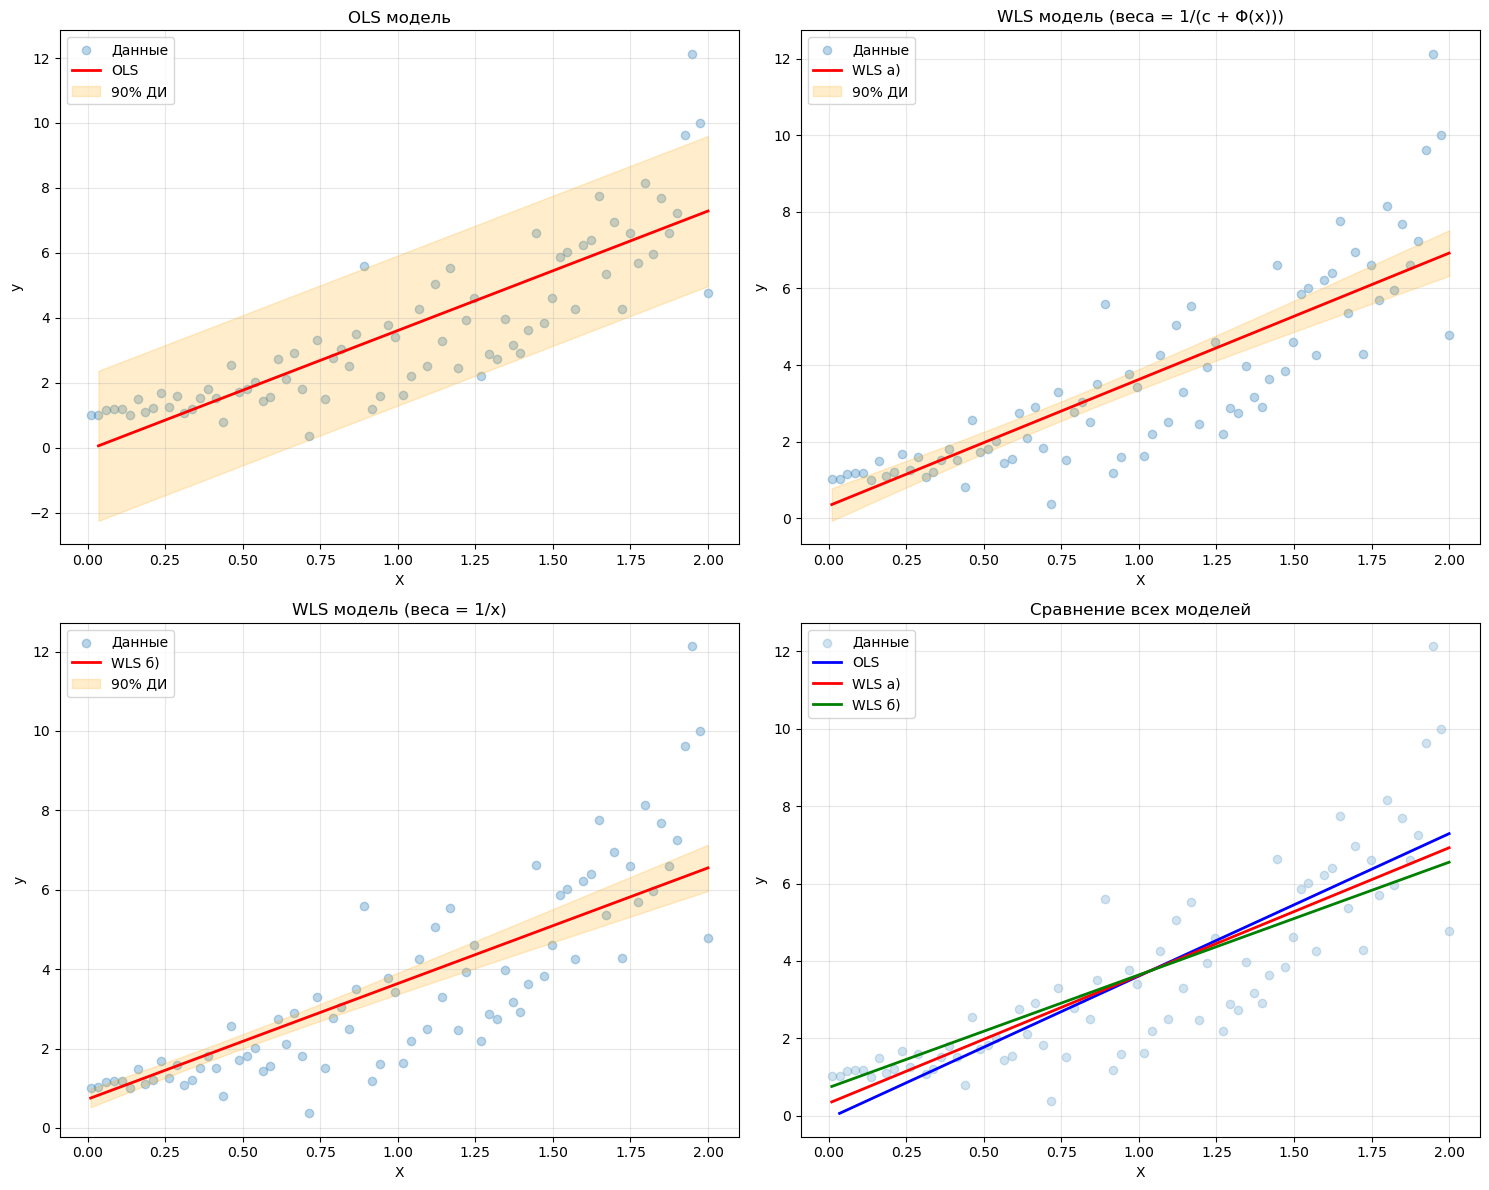

In [12]:
# Сравнительная визуализация всех моделей
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Предсказания WLS моделей для отсортированных данных
y_pred_wls_a_sorted = wls_results_a.predict(X_sorted_sm)
y_pred_wls_b_sorted = wls_results_b.predict(X_sorted_sm)

feature_name = 'X'
target_name = 'y'

# OLS модель
axes[0, 0].scatter(X, y, alpha=0.3, label='Данные')
axes[0, 0].plot(X_sorted, y_pred_sorted, 'r-', linewidth=2, label='OLS')
axes[0, 0].fill_between(X_sorted.flatten(), lower_90_sorted, upper_90_sorted, alpha=0.2, color='orange', label='90% ДИ')
axes[0, 0].set_xlabel(feature_name)
axes[0, 0].set_ylabel(target_name)
axes[0, 0].set_title('OLS модель')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# WLS модель а)
axes[0, 1].scatter(X, y, alpha=0.3, label='Данные')
axes[0, 1].plot(X_sorted_sm[:,1], y_pred_wls_a_sorted, 'r-', linewidth=2, label='WLS а)')
axes[0, 1].fill_between(X_sorted_sm[:,1].flatten(), conf_int_90_sorted_a[:, 0], conf_int_90_sorted_a[:, 1], 
                       alpha=0.2, color='orange', label='90% ДИ')
axes[0, 1].set_xlabel(feature_name)
axes[0, 1].set_ylabel(target_name)
axes[0, 1].set_title('WLS модель (веса = 1/(c + Φ(x)))')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# WLS модель б)
axes[1, 0].scatter(X, y, alpha=0.3, label='Данные')
axes[1, 0].plot(X_sorted_sm[:,1], y_pred_wls_b_sorted, 'r-', linewidth=2, label='WLS б)')
axes[1, 0].fill_between(X_sorted_sm[:,1].flatten(), conf_int_90_sorted_b[:, 0], conf_int_90_sorted_b[:, 1], 
                       alpha=0.2, color='orange', label='90% ДИ')
axes[1, 0].set_xlabel(feature_name)
axes[1, 0].set_ylabel(target_name)
axes[1, 0].set_title('WLS модель (веса = 1/x)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Сравнение всех моделей
axes[1, 1].scatter(X, y, alpha=0.2, label='Данные')
axes[1, 1].plot(X_sorted, y_pred_sorted, 'b-', linewidth=2, label='OLS')
axes[1, 1].plot(X_sorted_sm[:,1], y_pred_wls_a_sorted, 'r-', linewidth=2, label='WLS а)')
axes[1, 1].plot(X_sorted_sm[:,1], y_pred_wls_b_sorted, 'g-', linewidth=2, label='WLS б)')
axes[1, 1].set_xlabel(feature_name)
axes[1, 1].set_ylabel(target_name)
axes[1, 1].set_title('Сравнение всех моделей')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Задание 5

## Гистограммы распределения остатков моделей

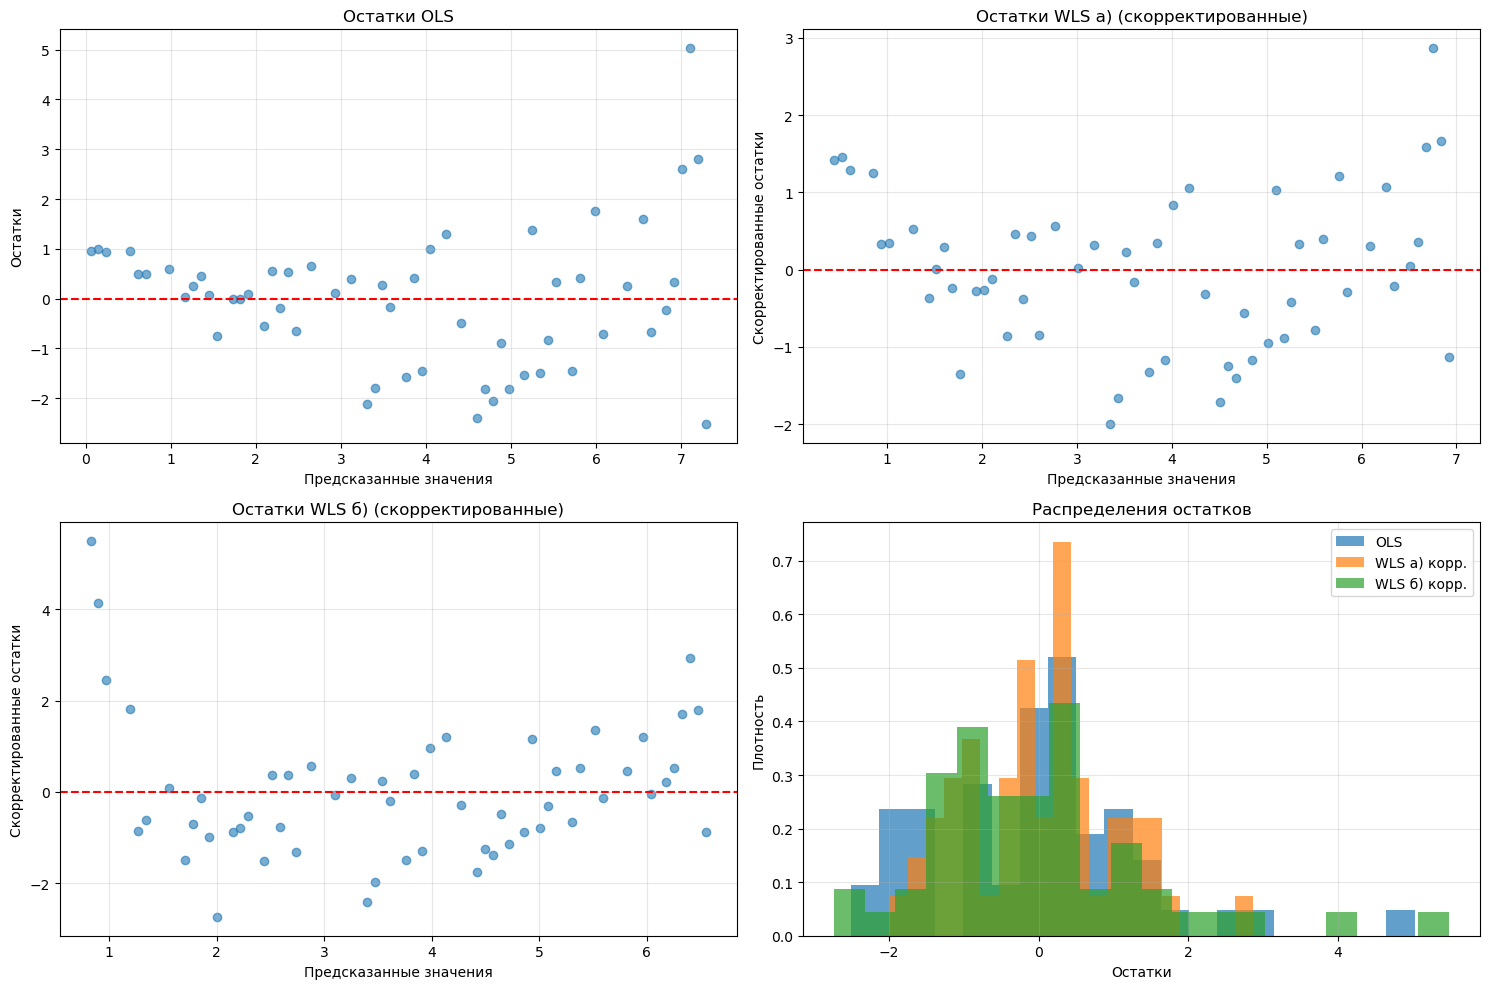

In [13]:
# Сравнительный анализ остатков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Остатки OLS
axes[0, 0].scatter(y_train_pred, residuals_train, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Предсказанные значения')
axes[0, 0].set_ylabel('Остатки')
axes[0, 0].set_title('Остатки OLS')
axes[0, 0].grid(True, alpha=0.3)

# Остатки WLS а)
axes[0, 1].scatter(y_train_pred_wls_a, corrected_residuals_a, alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Предсказанные значения')
axes[0, 1].set_ylabel('Скорректированные остатки')
axes[0, 1].set_title('Остатки WLS а) (скорректированные)')
axes[0, 1].grid(True, alpha=0.3)

# Остатки WLS б)
axes[1, 0].scatter(y_train_pred_wls_b, corrected_residuals_b, alpha=0.6)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Предсказанные значения')
axes[1, 0].set_ylabel('Скорректированные остатки')
axes[1, 0].set_title('Остатки WLS б) (скорректированные)')
axes[1, 0].grid(True, alpha=0.3)

# Сравнение распределений остатков
axes[1, 1].hist(residuals_train, alpha=0.7, bins=20, label='OLS', density=True)
axes[1, 1].hist(corrected_residuals_a, alpha=0.7, bins=20, label='WLS а) корр.', density=True)
axes[1, 1].hist(corrected_residuals_b, alpha=0.7, bins=20, label='WLS б) корр.', density=True)
axes[1, 1].set_xlabel('Остатки')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].set_title('Распределения остатков')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Проверка распределения остатков на нормальность

In [14]:
import scipy.stats as stats

def print_is_normal(name, data, alpha=0.05):
    print("="*20)
    print()
    print(f"Остатки {name}:")
    
    mu, sigma = stats.norm.fit(data)
    chi2_stat, p_value = stats.normaltest(data)
    if p_value < alpha:
        print("Распределение не нормальное")
    else:
        print("Распределение нормальное")
    
    print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print()
    print("="*20)

all_residuals = {
    'OLS train': residuals_train,
    'OLS test': y_test - y_test_pred,
    'WLS а) train': corrected_residuals_a,
    'WLS а) test': y_test - y_test_pred_wls_a,
    'WLS б) train': corrected_residuals_b,
    'WLS б) test': y_test - y_test_pred_wls_b
}

for name, residuals in all_residuals.items():
    print_is_normal(name, residuals)


Остатки OLS train:
Распределение не нормальное
Статистика хи-квадрат: 11.2626
p-value: 0.0036


Остатки OLS test:
Распределение нормальное
Статистика хи-квадрат: 0.6673
p-value: 0.7163


Остатки WLS а) train:
Распределение нормальное
Статистика хи-квадрат: 0.8443
p-value: 0.6556


Остатки WLS а) test:
Распределение нормальное
Статистика хи-квадрат: 0.2524
p-value: 0.8814


Остатки WLS б) train:
Распределение не нормальное
Статистика хи-квадрат: 19.8852
p-value: 0.0000


Остатки WLS б) test:
Распределение нормальное
Статистика хи-квадрат: 0.1059
p-value: 0.9484

